In [1]:
%cd /home/pill/lung/diffusion-anomaly-detection

/home/pill/lung/diffusion-anomaly-detection


In [2]:
import numpy as np
import pandas as pd
import cv2
import blobfile as bf
from matplotlib import pyplot as plt
# from torch.utils.data import DataLoader, Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
def visualize(img):
    '''
    Normalize for visualization.
    '''
    _min = img.min()
    _max = img.max()
    normalized_img = (img - _min) / (_max - _min)
    return normalized_img

In [4]:
def diff(org, sample):
    # return abs(visualize(org) - visualize(sample))
    return abs(visualize(org) - sample)
    # return abs(org - sample)

In [5]:
def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()

In [6]:
def _list_image_files_recursively(data_dir):
    results = []
    for entry in sorted(bf.listdir(data_dir)):
        full_path = bf.join(data_dir, entry)
        ext = entry.split(".")[-1]
        if "." in entry and ext.lower() in ["jpg", "jpeg", "png", "gif", "npy"]:
            results.append(full_path)
        elif bf.isdir(full_path):
            results.extend(_list_image_files_recursively(full_path))
    return results

In [7]:
def visualize_org_sample(path):
    org_path = './data/Image/LIDC-IDRI-' + path[0:4] + '/' + path
    sample_path = './sample_results/' + path
    mask_path = './data/Mask/LIDC-IDRI-' + path[0:4] + '/' + path
    org = np.load(org_path)
    org = cv2.resize(org, (256, 256))
    mask = np.load(mask_path)
    # mask = cv2.resize(mask, (256, 256))
    sample = np.load(sample_path)

    # diff=abs(visualize(org[0, 0,...])-visualize(sample[0,0, ...]))
    difference = diff(org, sample)
    # difference=np.array(difference.cpu())
    # viz.heatmap(np.flipud(diff), opts=dict(caption="diff"))

    fig = plt.figure(figsize=(10, 7))
    rows = 1
    columns = 3

    fig.add_subplot(rows, columns, 1)
    plt.imshow(org, cmap='gray')
    plt.title("Origin")

    fig.add_subplot(rows, columns, 2)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")


    fig.add_subplot(rows, columns, 3)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")

    plt.show()

    heatmap2d(difference)

visualize_org_sample('0002_slice074_0.npy')

FileNotFoundError: [Errno 2] No such file or directory: './data/Image/LIDC-IDRI-0002/0002_slice074_0.npy'

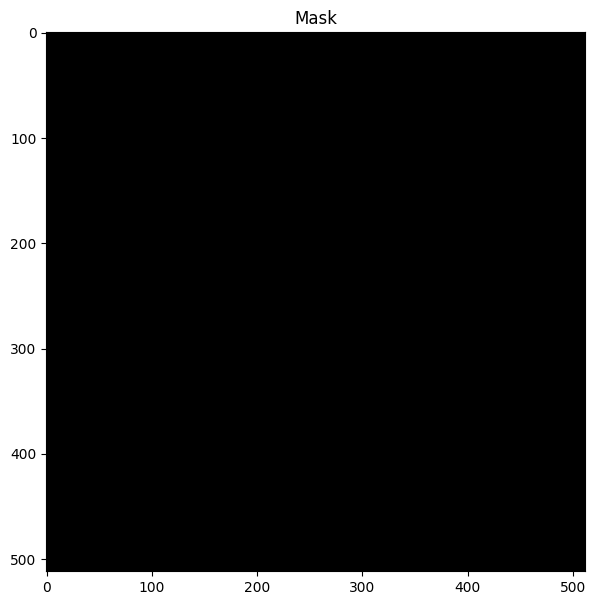

In [11]:
def aaa():
    sample = np.load("/home/pill/lung/Pytorch-UNet/results/sample_results/0003_slice075_1.npy")
    fig = plt.figure(figsize=(10, 7))
    rows = 1
    columns = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(sample, cmap='gray')
    plt.title("Mask")

aaa()

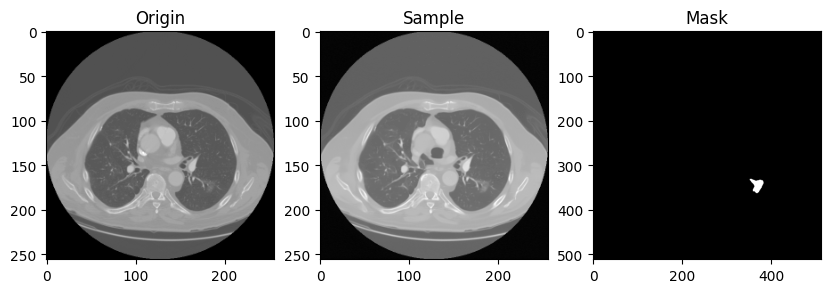

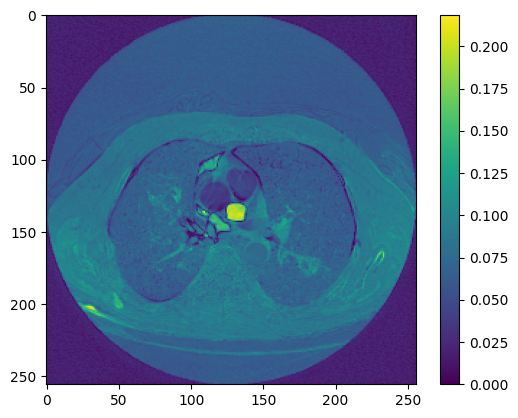

In [ ]:
visualize_org_sample('0003_slice067_1.npy')

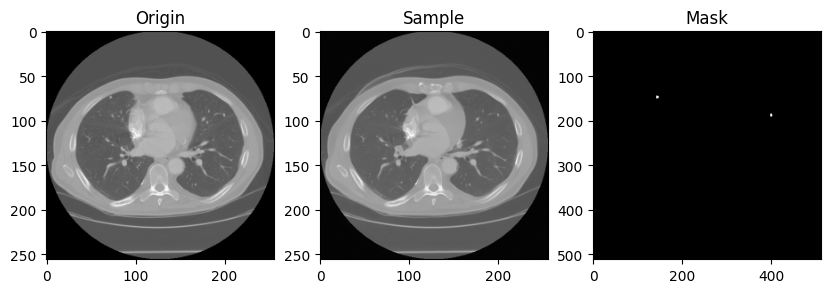

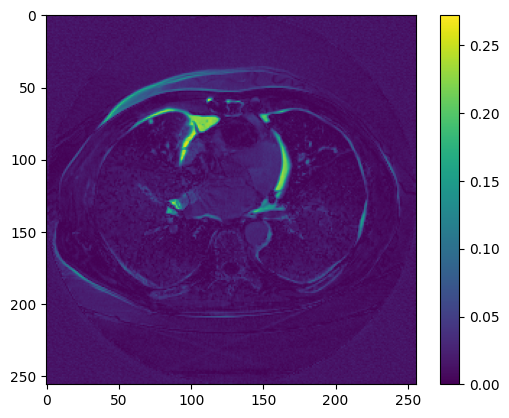

In [ ]:
visualize_org_sample('0011_slice058_1.npy')

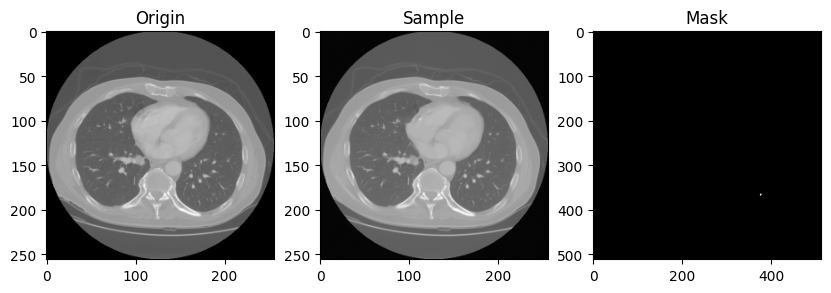

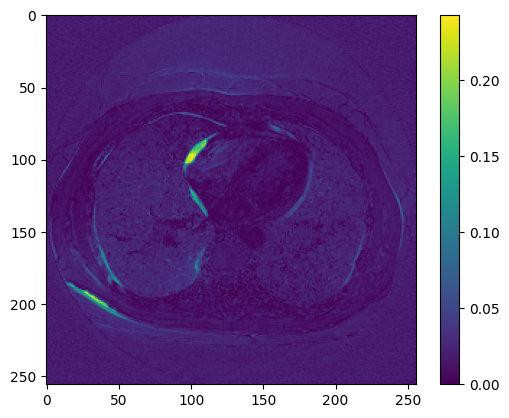

In [ ]:
visualize_org_sample('0046_slice049_1.npy')

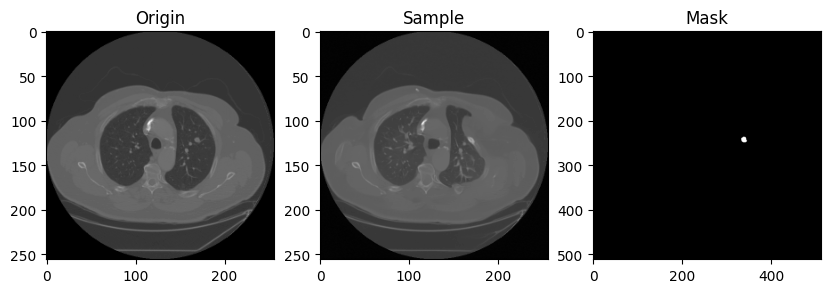

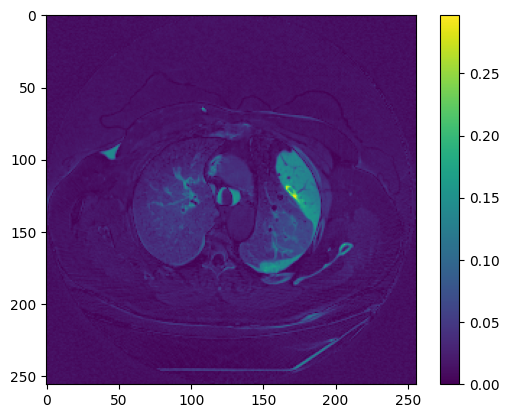

In [ ]:
visualize_org_sample('0051_slice095_1.npy')

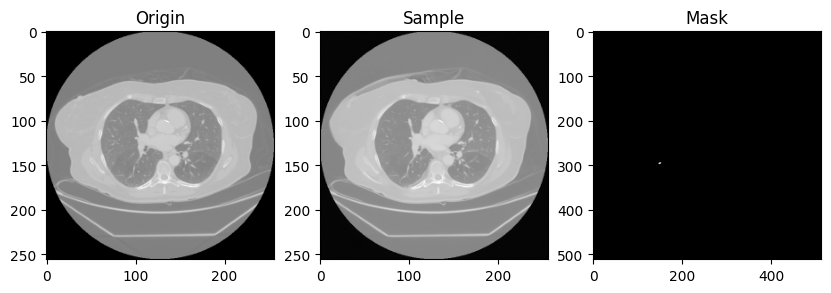

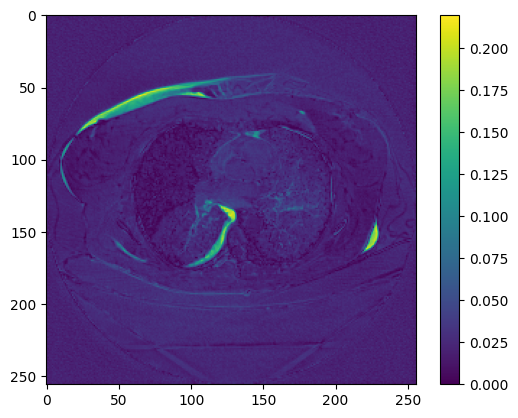

In [ ]:
visualize_org_sample('0056_slice119_1.npy')

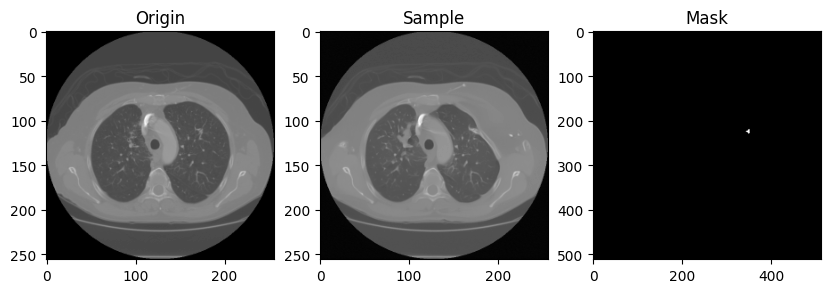

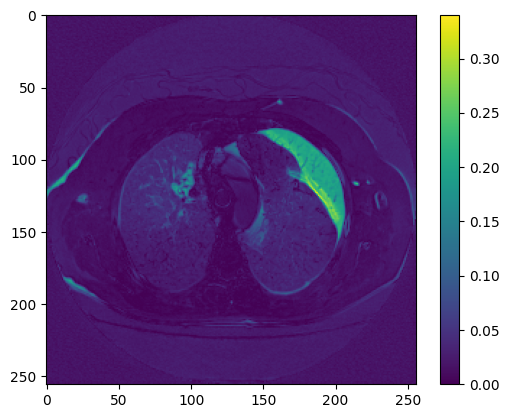

In [ ]:
visualize_org_sample('0060_slice083_1.npy')

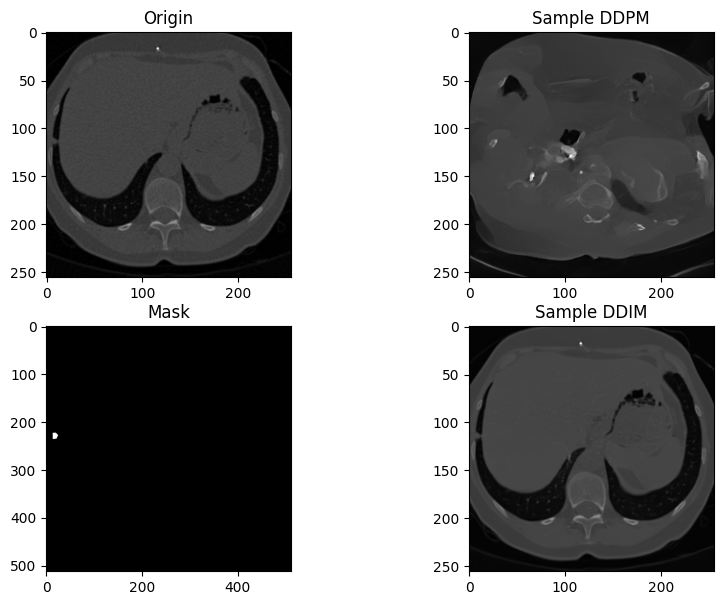

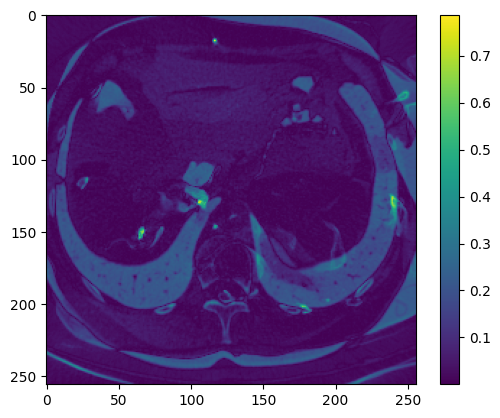

In [14]:
def visualize_ddpm_ddim(path):
    org_path = './data/Image/LIDC-IDRI-' + path[0:4] + '/' + path
    sample_path = './sample_results/' + path
    mask_path = './data/Mask/LIDC-IDRI-' + path[0:4] + '/' + path
    ddpm_path = '/home/pill/lung/' + path
    org = np.load(org_path)
    org = cv2.resize(org, (256, 256))
    mask = np.load(mask_path)
    # mask = cv2.resize(mask, (256, 256))
    sample = np.load(sample_path)
    ddpm = np.load(ddpm_path)

    # diff=abs(visualize(org[0, 0,...])-visualize(sample[0,0, ...]))
    difference = diff(org, sample)
    # difference=np.array(difference.cpu())
    # viz.heatmap(np.flipud(diff), opts=dict(caption="diff"))

    fig = plt.figure(figsize=(10, 7))
    rows = 2
    columns = 2

    fig.add_subplot(rows, columns, 1)
    plt.imshow(org, cmap='gray')
    plt.title("Origin")

    fig.add_subplot(rows, columns, 2)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample DDPM")


    fig.add_subplot(rows, columns, 3)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")

    fig.add_subplot(rows, columns, 4)
    plt.imshow(ddpm, cmap='gray')
    plt.title("Sample DDIM")

    plt.show()

    heatmap2d(difference)

visualize_ddpm_ddim('0487_slice051_1.npy')

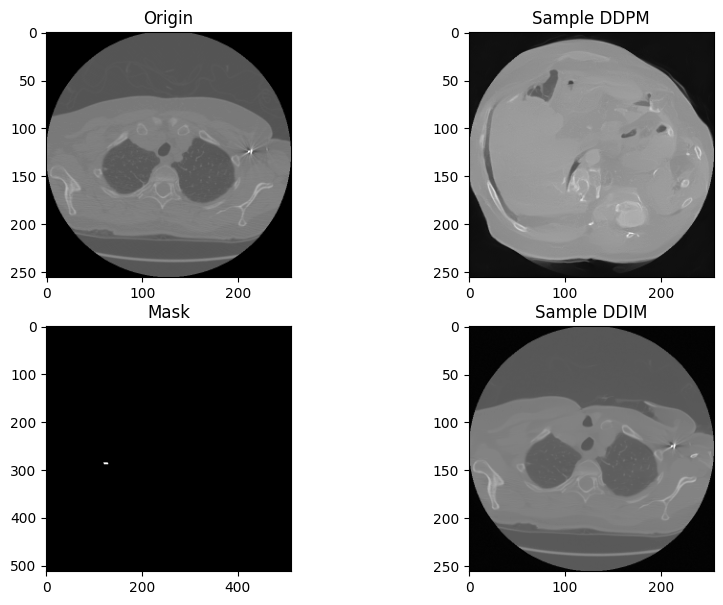

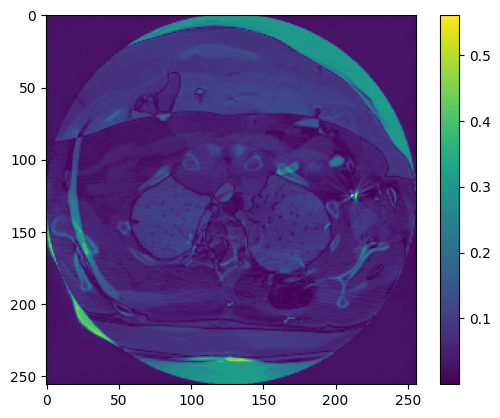

In [16]:
visualize_ddpm_ddim('0488_slice399_1.npy')

In [8]:
all_files = _list_image_files_recursively("./sample_results")
len(all_files)

2532

In [9]:
def convert(x):
    patient = x.split('/')[2][0:4]
    print(x)
    alo = x.replace('./sample_results', 'data/Image/LIDC-IDRI-' + patient)
    return alo

test_df = pd.read_csv('./data/test.csv', header=None)

test_files = [convert(f) for f in all_files]
test_files = [[x, x.replace('Image', 'Mask'), int(test_df.loc[test_df[0] == x][2])] for x in test_files]
df = pd.DataFrame(test_files)

./sample_results/0001_slice008_0.npy
./sample_results/0001_slice028_0.npy
./sample_results/0001_slice097_0.npy
./sample_results/0002_slice074_0.npy
./sample_results/0002_slice152_0.npy
./sample_results/0002_slice174_1.npy
./sample_results/0002_slice177_1.npy
./sample_results/0002_slice180_1.npy
./sample_results/0002_slice214_0.npy
./sample_results/0002_slice220_0.npy
./sample_results/0003_slice043_0.npy
./sample_results/0003_slice067_1.npy
./sample_results/0003_slice068_1.npy
./sample_results/0003_slice075_1.npy
./sample_results/0003_slice126_0.npy
./sample_results/0004_slice053_0.npy
./sample_results/0004_slice116_0.npy
./sample_results/0004_slice190_0.npy
./sample_results/0004_slice219_0.npy
./sample_results/0005_slice001_0.npy
./sample_results/0005_slice018_0.npy
./sample_results/0005_slice059_0.npy
./sample_results/0007_slice042_0.npy
./sample_results/0007_slice107_1.npy
./sample_results/0007_slice109_1.npy
./sample_results/0007_slice111_1.npy
./sample_results/0007_slice134_0.npy
.

In [10]:
df

,0,1,2
0,data/Image/LIDC-IDRI-0001/0001_slice008_0.npy,data/Mask/LIDC-IDRI-0001/0001_slice008_0.npy,0
1,data/Image/LIDC-IDRI-0001/0001_slice028_0.npy,data/Mask/LIDC-IDRI-0001/0001_slice028_0.npy,0
2,data/Image/LIDC-IDRI-0001/0001_slice097_0.npy,data/Mask/LIDC-IDRI-0001/0001_slice097_0.npy,0
3,data/Image/LIDC-IDRI-0002/0002_slice074_0.npy,data/Mask/LIDC-IDRI-0002/0002_slice074_0.npy,0
4,data/Image/LIDC-IDRI-0002/0002_slice152_0.npy,data/Mask/LIDC-IDRI-0002/0002_slice152_0.npy,0
...,...,...,...
2527,data/Image/LIDC-IDRI-0500/0500_slice028_0.npy,data/Mask/LIDC-IDRI-0500/0500_slice028_0.npy,0
2528,data/Image/LIDC-IDRI-0500/0500_slice080_0.npy,data/Mask/LIDC-IDRI-0500/0500_slice080_0.npy,0
2529,data/Image/LIDC-IDRI-0500/0500_slice094_0.npy,data/Mask/LIDC-IDRI-0500/0500_slice094_0.npy,0
2530,data/Image/LIDC-IDRI-0500/0500_slice103_0.npy,data/Mask/LIDC-IDRI-0500/0500_slice103_0.npy,0


In [11]:
df.to_csv("./results/test.csv", header=False, index=False)